# Task 1: Supervised learning

1) Go to https://archive.ics.uci.edu/ml/datasets/Census+Income and get the data for a binary classification task. Explore the data; study the variables, do a lot of visualizations, think and implement any feature engineering you might need, consider initial feature selections, and so on and so on.

In [20]:
import pandas as pd
import seaborn as sns
import sklearn.preprocessing as preprocessing

In [49]:
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_data = pd.read_csv('adult.data', names=headers)
test_data = pd.read_csv('adult.test', names=headers, skiprows=1)

In [50]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [52]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [53]:
test_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [54]:
encoder = preprocessing.LabelEncoder()
train_data['sex_dummy'] = encoder.fit_transform(train_data['sex'])
train_data['income_dummy'] = encoder.fit_transform(train_data['income'])
test_data['sex_dummy'] = encoder.fit_transform(test_data['sex'])
test_data['income_dummy'] = encoder.fit_transform(test_data['income'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefb27ac128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fefb1e8f978>]], dtype=object)

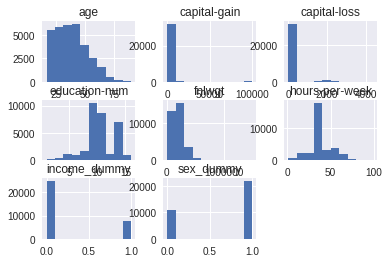

In [55]:
train_data.hist()

In [66]:
train_data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_dummy,income_dummy
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.088832,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,0.026858,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.012280,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.048480,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.045567,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229309,0.229689
sex_dummy,0.088832,0.026858,0.012280,0.048480,0.045567,0.229309,1.000000,0.215980
income_dummy,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,0.215980,1.000000


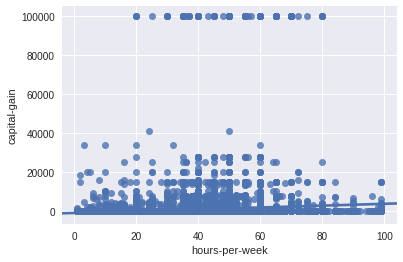

In [56]:
sns.regplot(y='capital-gain', x='hours-per-week', data=train_data)

2) After you have an insight of the data, build a machine learning model for the task with any algorithm of your choice. Fit the model, and evaluate its performance. Report at least accuracy (so that we can compare different solutions), but consider some other metrics too, and measure the performance with some other metric. You can choose the other metric freely, but please explain why you choose this metric, and explain briefly what this metric measures.

### Random forest

In [70]:
from sklearn.model_selection import train_test_split
x = train_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex_dummy']]
x_cv = test_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex_dummy']]
y = train_data['income_dummy']
y_cv = test_data['income_dummy']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.81599312123817713

In [90]:
rf.feature_importances_

array([ 0.20900427,  0.34611446,  0.12236057,  0.13701987,  0.04342304,
        0.10873213,  0.03334566])

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, x_cv, y_cv)

array([ 0.82163258,  0.81555187,  0.81094527])

In [82]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[5623,  520],
       [ 978, 1020]])

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.92      0.88      6143
          1       0.66      0.51      0.58      1998

avg / total       0.81      0.82      0.81      8141



3) Iterate the process at least a few times. Study the predictions that the model provided; what went wrong, and why? Are there any common elements in the incorrect predictions? For example, a relation between some misclassification and certain input variable values?

In [91]:
x2 = train_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']]
x2_cv = test_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y)
rf2 = RandomForestClassifier()
rf2.fit(x2_train, y2_train)
rf2.score(x2_test, y2_test)

0.7947426606068051

In [95]:
print(rf2.feature_importances_)
print(cross_val_score(rf2, x2_cv, y_cv))
y2_pred = rf.predict(x_test)
print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

[ 0.21228403  0.40800201  0.13514301  0.13336421  0.11120674]
[ 0.80597015  0.79970518  0.79620416]
[[5623  520]
 [ 978 1020]]
             precision    recall  f1-score   support

          0       0.85      0.92      0.88      6143
          1       0.66      0.51      0.58      1998

avg / total       0.81      0.82      0.81      8141



4) Now that you have a nice framework to try out models, try some other algorithm(s) and see how well it/they performs. Which algorithm performs best and why? What are the major differences between the algorithms? Do you consider the choice of the algorithm as an important step in solving the task? Please answer this: are you happy with the results, and was this an easy task to solve?

### KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.77558039552880487

In [86]:
cross_val_score(knn, x_cv, y_cv)

array([ 0.77704072,  0.77335544,  0.77114428])

In [87]:
y_pred_knn = knn.predict(x_test)
confusion_matrix(y_test, y_pred_knn)

array([[5692,  451],
       [1376,  622]])

In [88]:
print(classification_report(y_test, y_pred_knn))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86      6143
          1       0.58      0.31      0.41      1998

avg / total       0.75      0.78      0.75      8141

